In [81]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import seaborn

titanic_df = pd.read_csv('titanic_data.csv')

What factors made people more likely to survive the Titanic disaster?

###### Class
- Was there a relationship between class and survival rate? 
- Did passengers in first class have a higher rate of survival?


###### Age
- What was the average age of passengers? How old were the oldest and youngest passengers?
- Was there a relationship between a passenger's age and their survival rate?
- If ages were grouped by decade, which age group was most likely to survive?
- Did infants or children have a higher survival rate than the average person? Did the elderly have lower rates of survival?


###### SibSp and Parch

- Were passengers travelling with family have higher or lower survival rates?
- Travelling with what size family meant that a passenger had the highest rate of survival?


###### Missing Values and Outliers
There were no obvious outliers within the code that affected the survival rate of passengers. However, there were a number of missing values. The only ones that affected the results were missing 'age' values for a number of records, and so these records were removed from those calculations. This process is detailed within the 'Age' section below.

### Class

- Was there a relationship between class and survival rate? 
- Did passengers in first class have a higher rate of survival?

In [82]:
# define survived bar plot function

def survived_bar_plot(data, plot_title, *plot_xlabel):
    plt.figure()
    data.mean()['Survived'].plot(kind='bar')
    plt.title(plot_title, fontsize=16)
    plt.ylabel('Survival Rate')
    if plot_xlabel:
        plt.xlabel(''.join(plot_xlabel)) # convert tuple from variable argument to string
    plt.show()

The correlation between passenger class and survival is -0.338481035961


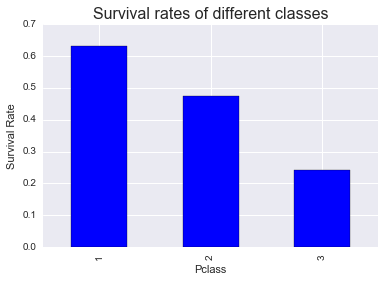

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


The average survival rate for all of the passengers in this sample was 0.383838383838


In [83]:
pclass_titanic = titanic_df.groupby('Pclass') # data grouped by passenger class
survived = titanic_df['Survived']
pclass = titanic_df['Pclass']

print "The correlation between passenger class and survival is " + str(np.corrcoef(survived, pclass)[0,1])

survived_bar_plot(pclass_titanic, 'Survival rates of different classes')

display(pclass_titanic.mean())
print "The average survival rate for all of the passengers in this sample was " + str(titanic_df['Survived'].mean())


From the table and correlation coefficient between, we can see that the class of passenger had a reasonably large effect on survival rate. The correlation coefficient of -0.338481035961 means that as the passenger class increased in number (The higher the number, the lower the social standing of the passenger. Passengers in 3rd class are of lower social standing than passengers in 1st class), they were less likely to survive.

This can be seen in the graph, and from the data in the table. Around 63% of 1st class passengers survived, compared to 47% of 2nd class, and 24% of 3rd class passengers. This is compared to the overall average survival rate of 38%.

Interestingly, the table also shows some other differences between the classes. The most predicatble one was the difference in average fares between the classes, with 1st class fares being much higher, and 3rd class fares being the lowest. 

There were also distinct differences in the average ages of the different classes, with 1st class passengers tending to be older, and 3rd class passengers the youngest on average. 

Finally, 3rd class passengers tended to travel with more family, with the highest average values for the number of siblings or spouses travelled with (SibSp), and the number of parents or children travelled with (Parch).

In conclusion, to answer the original questions, there was a reasonably strong relationship between class and survival rate. Those in first class had the highest rate of survival, followed by those in 2nd class, and lastly, 3rd class.

Note that I have not calculated whether these relationships are statistically significant.

### Age
- What was the average age of passengers? How old were the oldest and youngest passengers?
- Was there a relationship between a passenger's age and their survival rate?
- If ages were grouped by decade, which age group was most likely to survive?
- Did infants or children have a higher survival rate than the average person? Did the elderly have lower rates of survival?

###### Missing Values
*a number of records had no age recorded, and so these records were removed in the code below, so they would not affect the results.*


In [84]:
# this sections sets up the data sets for use in calculations below

age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80] # oldest passenger, as calculated below, is 80, so the highest value included is 80

copy_titanic_df = titanic_df.copy(deep=True) # created a copy, so as not to mess with the original data
copy_titanic_df['age_decades'] = pd.cut(copy_titanic_df['Age'], age_bins) # added a column with which decade each passenger's age falls in
age_titanic_df = copy_titanic_df[copy_titanic_df.Age.notnull()] # removed values where there was no age recorded for the passenger

The average age of passengers is 29.6991176471 years old.
The youngest passenger is 0.42 years old.
The oldest passenger is 80 years old.


Number of passengers in each age bracket
age_decades
(0, 10]      64
(10, 20]    115
(20, 30]    230
(30, 40]    155
(40, 50]     86
(50, 60]     42
(60, 70]     17
(70, 80]      5
Name: Age, dtype: int64




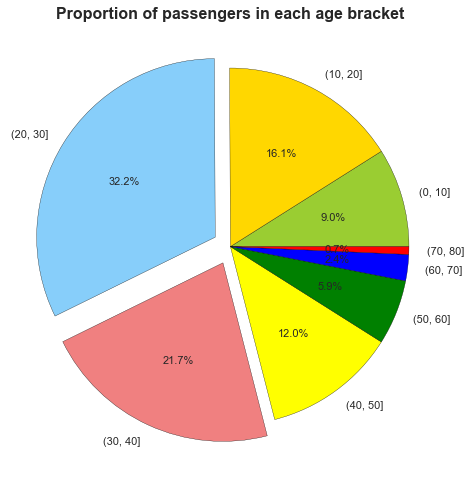

In [85]:
print "The average age of passengers is " + str(float(age_titanic_df['Age'].mean())) + " years old."
print "The youngest passenger is " + str(float(titanic_df['Age'].min())) + " years old."
print "The oldest passenger is " + str(int(titanic_df['Age'].max())) + " years old."

grouped_by_decade = age_titanic_df.groupby('age_decades')

print "\n"
print "Number of passengers in each age bracket"
print grouped_by_decade['Age'].count()
print "\n"

#print age_titanic_df['Age'].count()

#print "The proportion of passengers aged between 20 and 40 is " + str(int(titanic_df['Age'].max()))
explode = (0, 0, 0.1, 0.1, 0, 0, 0, 0)
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'yellow', 'green', 'blue', 'red']
plt.figure(figsize=(8,8), dpi=200)
(grouped_by_decade['Age'].count()/age_titanic_df['Age'].count()).plot(kind='pie', autopct='%1.1f%%', fontsize=11, explode=explode, colors=colors)
plt.title("Proportion of passengers in each age bracket", fontsize=16, fontweight="bold")
plt.xlabel("")
plt.ylabel("")
plt.show()

The correlation coefficient between age and survival of passengers is -0.0772210945722




,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
age_decades,,,,,,,
"(0, 10]",430.843750,0.593750,2.640625,4.268281,1.843750,1.421875,30.434439
"(10, 20]",447.660870,0.382609,2.530435,17.317391,0.591304,0.391304,29.529531
"(20, 30]",428.682609,0.365217,2.386957,25.423913,0.321739,0.239130,28.306719
"(30, 40]",468.690323,0.445161,2.090323,35.051613,0.374194,0.393548,42.496100
"(40, 50]",483.500000,0.383721,1.918605,45.372093,0.372093,0.430233,41.163181
"(50, 60]",449.809524,0.404762,1.523810,54.892857,0.309524,0.309524,44.774802
"(60, 70]",430.882353,0.235294,1.529412,63.882353,0.176471,0.352941,45.910782
"(70, 80]",438.200000,0.200000,1.800000,73.300000,0.000000,0.000000,25.936680


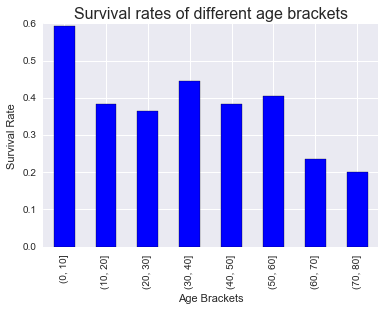

In [86]:

age = age_titanic_df['Age']
age_survived = age_titanic_df['Survived'] # new 'survived' series to match the series 'age'
print "The correlation coefficient between age and survival of passengers is " + str(np.corrcoef(age, age_survived)[0,1])
print "\n"

display(grouped_by_decade.mean())

print "\n"

survived_bar_plot(grouped_by_decade, 'Survival rates of different age brackets', 'Age Brackets')

The average age of the passengers was about 29.7 years old. Note that passengers without ages recorded were removed from these calculations. The youngest passenger was 0.42 years old, which is around 5 months, and the oldest passenger was 80 years old. 

As you can see from the pie chart and table, the age bracket with the most passengers was between 20 and 30 years old. In fact, as you can see from the pie chart, over half of the passengers were aged between 20-40 years old.  

The correlation coefficient between age and survival of passengers is -0.0772210945722, meaning the older the passenger, the less likely they would survive. The relationship is not a strong one though, and we can see from the graph above, that the age brackets between 10 and 60 did not have greatly differing survival rates, and showed no distinct pattern or direction. 

However, the age brackets on the extremities, below 10 years old, and above 60 years old, showed a quite distinct difference. Passengers between the ages of 0-10 were the most likely to survive, with a survival rate of almost 60%, whilst passengers between 60-70 y.o., and 70-80 y.o. had survival rates of 23% and 20% respectively, much lower than the average of 38%, mentioned previously. However, due to the low sample number of people over the age of 70, we must be cautious with those results.

Having noticed the differences at the extremities, but not in the middle, I wondered if there might be a better way to categorize the ages of the passengers. Why would the youngest be more likely to survive, despite being themselves more susceptible to harsh conditions, and the elderly less likely? Well, the children would most likely be taken care of by their parents, and given priority in accessing rescue boats. The elderly likewise may have had priority as well, but it's clear they did not survive for other reasons, possibly because they couldn't survive the harsh conditions while awaiting rescue. 

With this in mind, I constructed some other age groups taking into consideration the amount of care and priority they may have been given by a parent or carer, and also grouping the older decades, and keeping the rest of the passengers together in their own group.

I defined 'infants' as people under the age of 4, and 'children' as people between the ages of 4 and 12, 
'adolescents' as people between the ages of 13 and 18, and the 'elderly' as people over the age of 60. The group 'other' contained everyone else.


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
age_groups,,,,,,,
Infants,396.700000,0.666667,2.533333,1.672333,1.733333,1.366667,33.364307
Children,459.923077,0.512821,2.717949,7.153846,1.974359,1.435897,30.130233
Adolescents,458.371429,0.428571,2.485714,16.578571,0.657143,0.471429,33.451313
Other,449.996383,0.388788,2.180832,33.025316,0.339964,0.311031,34.980318
Elderly,432.545455,0.227273,1.590909,66.022727,0.136364,0.272727,41.371214


age_groups
Infants         30
Children        39
Adolescents     70
Other          553
Elderly         22
Name: Age, dtype: int64


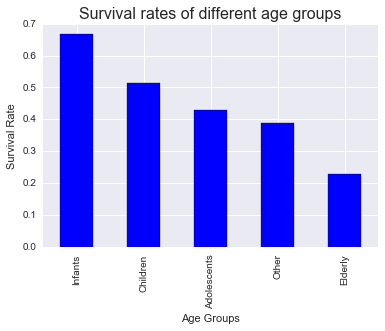

In [87]:
new_age_bins = [0, 3, 12, 18, 60, 80]
labels = ['Infants', 'Children', 'Adolescents', 'Other', 'Elderly']
copy_titanic_df['age_groups'] = pd.cut(copy_titanic_df['Age'], new_age_bins, labels=labels)
age_groups = copy_titanic_df.groupby('age_groups')
display(age_groups.mean())
print age_groups['Age'].count()

survived_bar_plot(age_groups, 'Survival rates of different age groups', 'Age Groups')


The rationale behind the choosing of the groups was that children of different ages need different levels of care from their parents, have differing levels of independence, and may have been treated differently in the event of a disaster such as the Titanic sinking, and that the elderly may have had more trouble physically surviving the disaster. I labelled 'Infants' as children under the age of 4, who would have been under supervision constantly; 'Children' as people between the ages of 4 and 12, who would have had a little more leeway and independence; 'Adolescents' as people between the ages of 12 and 18, who would've been more independent still, and some of whom owuld be treated almost as adults; 'Elderly' as people over the age of 60, who may have had much more trouble physically surviving the ordeal; and 'Other' as everyone else, which would be people between the ages of 18 and 60. 

As you can see from the second table above, most passengers fell within the 'Other' category. However, there were at least 22 people in each of the other categories. 

Interestingly, as you can see from the graph above, 'Infants' had much the highest survival rate, of 67%, followed by 'Children' of which 51% survived. The survival rate of 'Adolescents' was close to that of the general group 'Other', though still a little higher, whilst the group 'Elderly' had a much lower survival rate of 23%.

These age groupings seemed to better describe the differences in survival rates between passengers, and show that there was a relationship between age and survival rate. Using these and the previous set of results, it shows that up to the age of 12, and possibly even 18, a passenger's rate of survival decreased as they got older. Then, until the age of about 60, their chance of survival didn't change a lot with age, whilst for passengers over the age of 60, the survival rate decreased again.

Note that these results have not been tested for statistical significance. Also, for the second set of results, using the same rationale, but different values for the age groupings would have resulted in rather different values. You can see this below, by by changing cut-off value between the 1st and 2nd bins from '3' to '5'. 


In [88]:
print 'Table From Original Values'
new_age_bins = [0, 3, 12, 18, 60, 80]
labels = ['Infants', 'Children', 'Adolescents', 'Other', 'Elderly']
copy_titanic_df['age_groups'] = pd.cut(copy_titanic_df['Age'], new_age_bins, labels=labels)
age_groups = copy_titanic_df.groupby('age_groups')
display(age_groups.mean())


print 'Table From Altered Values'
new_age_bins = [0, 5, 12, 18, 60, 80]
copy_titanic_df['age_groups'] = pd.cut(copy_titanic_df['Age'], new_age_bins, labels=labels)
age_groups = copy_titanic_df.groupby('age_groups')
display(age_groups.mean())



Table From Original Values


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
age_groups,,,,,,,
Infants,396.700000,0.666667,2.533333,1.672333,1.733333,1.366667,33.364307
Children,459.923077,0.512821,2.717949,7.153846,1.974359,1.435897,30.130233
Adolescents,458.371429,0.428571,2.485714,16.578571,0.657143,0.471429,33.451313
Other,449.996383,0.388788,2.180832,33.025316,0.339964,0.311031,34.980318
Elderly,432.545455,0.227273,1.590909,66.022727,0.136364,0.272727,41.371214


Table From Altered Values


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
age_groups,,,,,,,
Infants,410.954545,0.704545,2.568182,2.503864,1.704545,1.363636,31.528030
Children,470.240000,0.360000,2.760000,8.760000,2.160000,1.480000,31.551000
Adolescents,458.371429,0.428571,2.485714,16.578571,0.657143,0.471429,33.451313
Other,449.996383,0.388788,2.180832,33.025316,0.339964,0.311031,34.980318
Elderly,432.545455,0.227273,1.590909,66.022727,0.136364,0.272727,41.371214


In conclusion, to answer the original questions, there was a reasonably strong relationship between a passenger's age and their survival rate, though it was not linear, and came into effect only on the extremities of the age spectrum.

If ages were grouped by decade, the age group of 0-10 year olds had the highest proportion of survivors.

Age groupings of a different sort were more informative however. Infants had a much higher than average rate of survival, no matter whether you defined them as 0-3 year olds or up to 0-5 year olds. The elderly had a lower rate of survival than the average. However, whether children had a higher survival rate than the average depended on how the group was defined. Defined as 4-12 year olds, and the survival rate was higher. Defined as 6-12 year olds, it was a little lower, and so the answer depends on the ages included in the group. 

### SibSp and ParCh
- Were passengers travelling with family have higher or lower survival rates?
- Travelling with what size family meant that a passenger had the highest rate of survival?

The correlation between the number of siblings and spouses a passenger travelled with, and their survival rate is -0.0353224988857


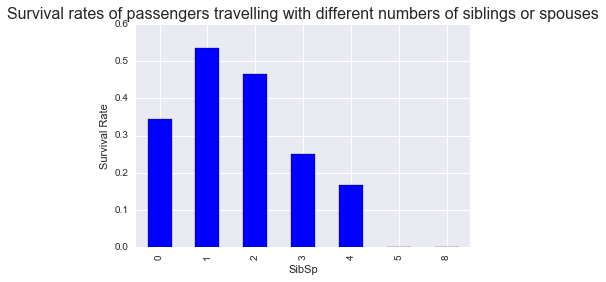

,PassengerId,Survived,Pclass,Age,Parch,Fare
SibSp,,,,,,
0,455.370066,0.345395,2.351974,31.397558,0.185855,25.692028
1,439.727273,0.535885,2.057416,30.089727,0.655502,44.147370
2,412.428571,0.464286,2.357143,22.620000,0.642857,51.753718
3,321.562500,0.250000,2.562500,13.916667,1.312500,68.908862
4,381.611111,0.166667,3.000000,7.055556,1.500000,31.855556
5,336.800000,0.000000,3.000000,10.200000,2.000000,46.900000
8,481.714286,0.000000,3.000000,NaN,2.000000,69.550000


The average survival rate for all of the passengers in this sample was 0.383838383838
SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: Pclass, dtype: int64


In [89]:
sibsp_titanic = titanic_df.groupby('SibSp') # data grouped by SibSp value
survived = titanic_df['Survived']
sibsp = titanic_df['SibSp']

print "The correlation between the number of siblings and spouses a passenger travelled with, and their survival rate is " + str(np.corrcoef(survived, sibsp)[0,1])

survived_bar_plot(sibsp_titanic, 'Survival rates of passengers travelling with different numbers of siblings or spouses')

display(sibsp_titanic.mean())
print "The average survival rate for all of the passengers in this sample was " + str(titanic_df['Survived'].mean())

print sibsp_titanic["Pclass"].count()

From the graphs and tables above, we can see that the number of siblings and spouses that a passenger is travevlling with did have an effect on their survival rate. Firstly, the correlation coefficient between the value 'SibSp' and the survival rate was only very slightly negative, meaning that the higher the value of 'SibSp', the lower your chance of survival. It was only a very small amount though, around -0.035. However, this doesn't adeqautely describe the whole relationship. 

We can see from the bar chart and table above, that the survival rates for different values of 'SibSp' were quite different. Those travelling alone had a survival rate of 35%, a little lower than the overall average of 38%. However, those travelling with one spouse or sibling had a much higher survival rate of 54%. Even those with a 'SibSp' value of 2 had a higher survival rate of 46%. There is a smaller sample set for passengers with values of 'SibSp' above 2, but we can see that those people had a much lower survival rate. In fact, no passengers in the sample set travelling with over 4 siblings, including spouses, survived. 

We can conclude that travelling with one, even two siblings or spouses tended to have a better survival rate. Travelling with none meant you were slightly less likely than the average passenger to survive, but travelling with 3 or more meant you were less likely to survive. Note that these conclusions have not been tested for statistical significance.

The correlation between the number of parents or children a passenger travelled with, and their survival rate is 0.0816294070835


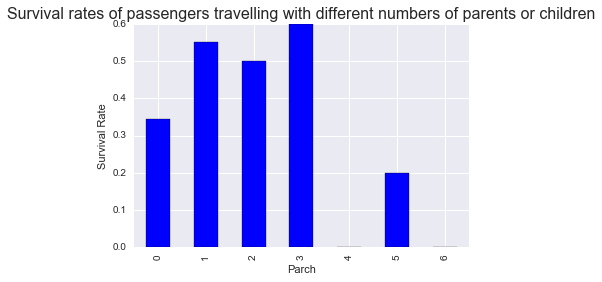

,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


The average survival rate for all of the passengers in this sample was 0.383838383838
Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Pclass, dtype: int64


In [90]:
parch_titanic = titanic_df.groupby('Parch') # data grouped by SibSp value
survived = titanic_df['Survived']
parch = titanic_df['Parch']

print "The correlation between the number of parents or children a passenger travelled with, and their survival rate is " + str(np.corrcoef(survived, parch)[0,1])

survived_bar_plot(parch_titanic, 'Survival rates of passengers travelling with different numbers of parents or children')

display(parch_titanic.mean())
print "The average survival rate for all of the passengers in this sample was " + str(titanic_df['Survived'].mean())

print parch_titanic["Pclass"].count()

The correlation coefficient between the number of parents or children a passenger travelled with, and their survival rate is about 0.082. This means that travelling with more parents or children has a small positive relationship on a passenger's survival rate. However, again this doesn't tell the whole story.

The vast majority of passengers travelled without parents or children, and had a survival rate slightly under the overall average. Those who travelled with 1 or 2 parents or children had a much higher survival rate, of over 50%. There are only a few data points for passengers who travelled with 4 or more parents or children, and so the data might not be accurate enough, however it points to lower survival rates for passengers travelling with a lot of parents or children. 

From this data, we can conclude that, like the 'SibSp' value, the 'Parch' value has an effect on the survival rate of a passenger, though it is not a linear relationship. To see what size families had best chances of survival, we must combine the 'SibSp' and 'Parch' values.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family_size
family_size_groups,,,,,,,,
0,458.000000,0.303538,2.400372,32.220297,0.000000,0.000000,21.242689,0.000000
1,412.838509,0.552795,1.919255,31.391511,0.763975,0.236025,49.894129,1.000000
2,448.352941,0.578431,2.225490,26.035806,0.872549,1.127451,39.692482,2.000000
3,514.344828,0.724138,2.068966,18.274815,1.344828,1.655172,54.864510,3.000000
4-10,392.338710,0.161290,2.774194,17.843137,3.467742,2.241935,58.289787,5.709677


The correlation between the size of the family a passenger travelled with, and their survival rate is 0.0166389892827


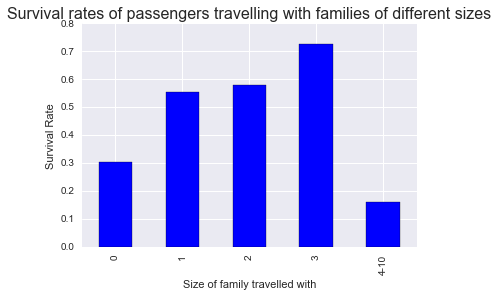

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family_size
family_size_groups,,,,,,,,
0,458.000000,0.303538,2.400372,32.220297,0.000000,0.000000,21.242689,0.000000
1,412.838509,0.552795,1.919255,31.391511,0.763975,0.236025,49.894129,1.000000
2,448.352941,0.578431,2.225490,26.035806,0.872549,1.127451,39.692482,2.000000
3,514.344828,0.724138,2.068966,18.274815,1.344828,1.655172,54.864510,3.000000
4-10,392.338710,0.161290,2.774194,17.843137,3.467742,2.241935,58.289787,5.709677


The average survival rate for all of the passengers in this sample was 0.383838383838
family_size_groups
0       537
1       161
2       102
3        29
4-10     62
Name: Pclass, dtype: int64


In [91]:
family_titanic_df = titanic_df.copy(deep=True) # created a copy, so as not to mess with the original data
family_titanic_df['family_size'] = family_titanic_df['SibSp'] + family_titanic_df['Parch'] # family_size is the sum of the SibSp and Parch values for a passenger
family_size = family_titanic_df['family_size']

family_bins = [-0.5,0.5,1.5,2.5,3.5,10] # family sizes of 4 and above had few data points, and so they were grouped together
family_labels = ['0','1','2','3','4-10'] 

family_titanic_df['family_size_groups'] = pd.cut(family_titanic_df['family_size'], family_bins, labels=family_labels)
family_size_groups = family_titanic_df.groupby('family_size_groups')
display(family_size_groups.mean())



print "The correlation between the size of the family a passenger travelled with, and their survival rate is " + str(np.corrcoef(survived, family_size)[0,1])

survived_bar_plot(family_size_groups, 'Survival rates of passengers travelling with families of different sizes', 'Size of family travelled with')

display(family_size_groups.mean())
print "The average survival rate for all of the passengers in this sample was " + str(titanic_df['Survived'].mean())

print family_size_groups["Pclass"].count()




New values for 'family_size' were created by adding together the 'SibSp' and 'Parch' values. Since there were too few data points for family sizes of 4 and above, they were grouped together. Note, that these 'family_size' values do not include the passenger themselves. Those travelling alone would have a family size of 0, whilst those travelling with just a spouse would have a family size of 1. 

With these groupings, it's easier to see how the size of the family that a passenger was travelling with affected their survival rate. 

The correlation coefficient between family size and survival rate was close to zero. However, looking at the data a little more closely shows that there is a much stronger relationship than the corellation coefficient suggests.

Most passengers travelled with no family, and they had a survival rate of 30%, a fair bit lower than the average. However, those travelling with 1-3 family members had a much higher rate of survival, between 55-73%. Family sizes larger than this though had a very negative effect on survival rate, with the average being 16% for travelling with families of 4 or more. 

No tests for statistical significance were taken, however the number of data points for most values suggest that the relationship between family size and survival rate is reasonably robust. However, this relationship is not linear, and so is not shown in the correlation coefficient. 

In conclusion, to answer the original questions, whether a passenger travelling with family had a higher or lower survival rate than average, depended on what size family a passenger was travelling with. However, based on the the fact that the survival rate of those travelling alone was below the average, then those travelling with family were more likely to survive. Those travelling with three family members were most likely to have survived out of everyone, though it was the group with the least amount of data entries. 

In this section, I have gathered the original questions and their relevant conclusions, for ease of access:

### Class

- ###### Was there a relationship between class and survival rate? 

Yes, there was a reasonably strong relationship between class and survival rate.

- ###### Did passengers in first class have a higher rate of survival?

Those in first class had the highest rate of survival, followed by those in 2nd class, and lastly, 3rd class.



### Age

- ###### What was the average age of passengers? How old were the oldest and youngest passengers?

The average age of the passengers was about 29.7 years old. The youngest passenger was 0.42 years old, which is around 5 months, and the oldest passenger was 80 years old. Over half of the passengers were aged between 20-40 years old.

- ###### Was there a relationship between a passenger's age and their survival rate?

Yes, there was a reasonably strong relationship between a passenger's age and their survival rate, though it was not linear, and came into effect only on the extremities of the age spectrum.

- ###### If ages were grouped by decade, which age group was most likely to survive?

The age group of 0-10 year olds had the highest proportion of survivors.

- ###### Did infants or children have a higher survival rate than the average person? Did the elderly have lower rates of survival?

Infants had a much higher than average rate of survival, no matter whether you defined them as 0-3 year olds or up to 0-5 year olds. The elderly had a lower rate of survival than the average. However, whether children had a higher survival rate than the average depended on how the group was defined. Defined as 4-12 year olds, and the survival rate was higher. Defined as 6-12 year olds, it was a little lower, and so the answer depends on the ages included in the group. 



### SibSp and Parch

- ###### Were passengers travelling with family have higher or lower survival rates?

Whether a passenger travelling with family had a higher or lower survival rate than average, depended on what size family a passenger was travelling with. However, based on the the fact that the survival rate of those travelling alone was below the average, then those travelling with family were more likely to survive.

- ###### Travelling with what size family meant that a passenger had the highest rate of survival?

Those travelling with three family members were most likely to have survived out of everyone, though it was the group with the least amount of data entries. 





*Note that none of the conclusions were tested for statistical significance, and this would need to be done to be able to make more robust statements.*


To take the study further, one could look at another characteristic of the passengers, for example, gender. You could also look at intersections between the data values, to more accurately describe the group of passengers. For example, compare the survival rates of females travelling with children, and males travelling with children. Or the survival rates of infants travelling in first class, versus infants travelling in thrid class.